In [ ]:
pip install opendatasets

In [ ]:
 import tensorflow as tf
 import numpy as np
 from tensorflow import keras
 from tensorflow.keras import layers
 import matplotlib.pyplot as plt
 from tensorflow.keras.models import Sequential
 from tensorflow.keras.models import load_model
 from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
 from tensorflow.keras.preprocessing.image import ImageDataGenerator
 from tensorflow.keras.preprocessing import image
 import pandas as pd
 import opendatasets as od
 import kagglehub
 from kagglehub import KaggleDatasetAdapter

In [ ]:
od.download("https://www.kaggle.com/datasets/maitridsavla/alzimer-segmented")

Skipping, found downloaded files in "./alzimer-segmented" (use force=True to force download)


In [ ]:
data_dir = "/content/alzimer-segmented/segmented_images/train"

In [ ]:
train_data = ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [ ]:
train_gen = train_data.flow_from_directory(data_dir,target_size=(150,150),batch_size=32,class_mode="categorical",subset="training")


Found 4098 images belonging to 4 classes.


In [ ]:
val_gen = train_data.flow_from_directory(data_dir,target_size=(150,150),batch_size=32,class_mode="categorical", subset="validation")


Found 1023 images belonging to 4 classes.


In [ ]:
model = keras.Sequential([layers.Conv2D(16,3,padding="same",activation="relu",input_shape=(150,150,3)),
                          layers.MaxPooling2D((2,2)),
                          layers.Conv2D(32,3,padding="same",activation="relu"),
                          layers.MaxPooling2D((2,2)),
                          layers.Flatten(),
                          layers.Dense(128,activation="relu"),
                          layers.Dense(4,activation="softmax")])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 150, 150, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 75, 75, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 75, 75, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 37, 37, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 43808)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     5,607,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,613,156 (21.41 MB)

 Trainable params: 5,613,156 (21.41 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
class_indices = train_gen.class_indices
class_name = list(class_indices.keys())
print(class_indices)
print(class_name)

{'MildDemented': 0, 'ModerateDemented': 1, 'NonDemented': 2, 'VeryMildDemented': 3}
['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']


In [ ]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [ ]:
model.fit(train_gen,epochs=5,validation_data=val_gen,batch_size=32)

Epoch 1/5
129/129 ━━━━━━━━━━━━━━━━━━━━ 91s 707ms/step - accuracy: 0.6565 - loss: 0.7988 - val_accuracy: 0.4399 - val_loss: 1.1440
Epoch 2/5
129/129 ━━━━━━━━━━━━━━━━━━━━ 91s 709ms/step - accuracy: 0.7896 - loss: 0.5248 - val_accuracy: 0.5034 - val_loss: 1.1354
Epoch 3/5
129/129 ━━━━━━━━━━━━━━━━━━━━ 138s 677ms/step - accuracy: 0.8905 - loss: 0.3036 - val_accuracy: 0.5249 - val_loss: 1.2885
Epoch 4/5
129/129 ━━━━━━━━━━━━━━━━━━━━ 92s 715ms/step - accuracy: 0.9498 - loss: 0.1567 - val_accuracy: 0.5875 - val_loss: 1.2988
Epoch 5/5
129/129 ━━━━━━━━━━━━━━━━━━━━ 92s 714ms/step - accuracy: 0.9835 - loss: 0.0692 - val_accuracy: 0.6246 - val_loss: 1.2794


In [ ]:
model.save('/content/alzimer-segmented/alzheimer.h5')

In [ ]:
model = load_model('/content/alzimer-segmented/alzheimer.h5')
print("Model Loaded")

Model Loaded


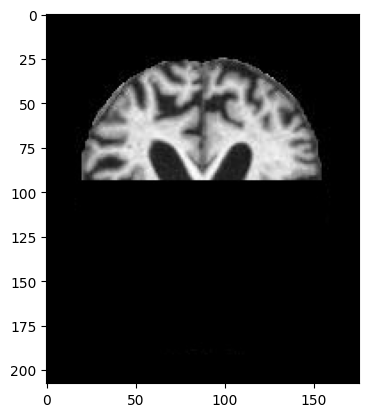

In [ ]:
test_image = image.load_img("/content/alzimer-segmented/segmented_images/test/ModerateDemented/28 (2).jpg")
plt.imshow(test_image)
plt.axis()
plt.show()

In [ ]:
img_array = image.img_to_array(test_image.resize((150, 150)))
img_array = np.expand_dims(img_array,axis=0)
img_array/=255


In [ ]:
 prediction = model.predict(img_array)
 ind=np.argmax(prediction)
 prediction=prediction[0][ind]
 print(prediction)
 print(class_name[ind])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
0.5281722
ModerateDemented
